# Repo
https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter/data

In [1]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

In [28]:
# Read the data
data = pd.read_csv('sample.csv',sep=';',encoding = 'latin1')
data.head(3)

# data_sample = data.head(20)

# Save to new CSV
# data_sample.to_csv('twcs_sample.csv', index=False, encoding='latin1')

,tweet_id,author_id,inbound,created_at,text,text_altered,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,@sprintcare I have sent several private messag...,1,4.0


1. Definition of the Dataset (5 Points)
- Comprehensive and clear definition: 5 points
- Partially clear definition: 3 points
- Vague or incomplete definition: 1 point

The answer will be...
True appears 10 times in the inbound field
False appears 10 times in the inbound field


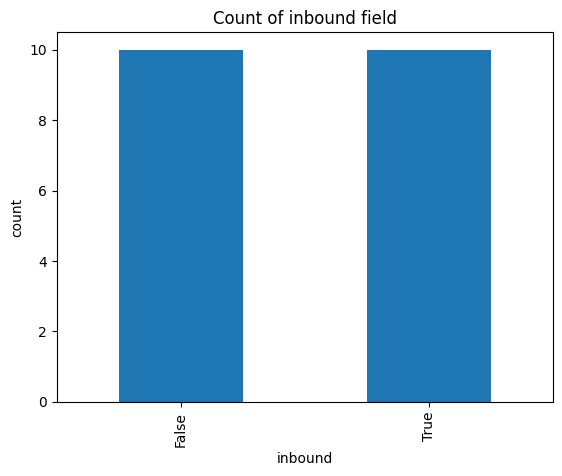

In [29]:
# count the time of label in the field
inbound_counts = data['inbound'][data['inbound'].isin([True, False])].value_counts()

print("The answer will be...")
print("True appears {} times in the inbound field".format(inbound_counts[True]))
print("False appears {} times in the inbound field".format(inbound_counts[False]))

import matplotlib.pyplot as plt

inbound_counts.plot(kind='bar')
plt.title('Count of inbound field')
plt.xlabel('inbound')
plt.ylabel('count')
plt.show()


The answer will be...
WORK_OF_ART appears 2 times in the entities
PERSON appears 17 times in the entities
CARDINAL appears 8 times in the entities
ORG appears 11 times in the entities
DATE appears 11 times in the entities
NORP appears 3 times in the entities
MONEY appears 8 times in the entities
GPE appears 4 times in the entities
TIME appears 4 times in the entities
FAC appears 1 times in the entities


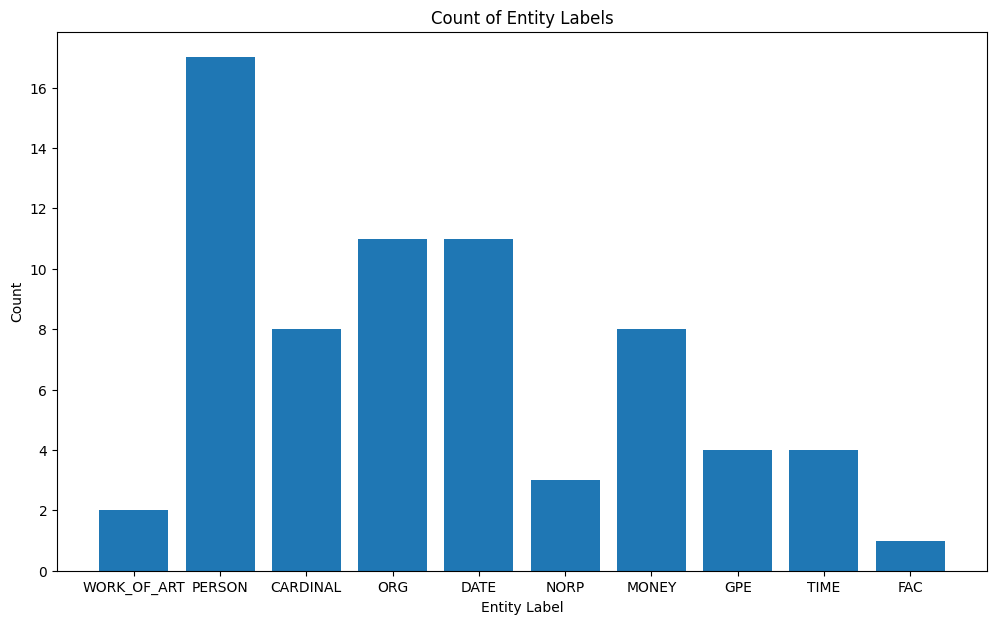

The answer will be...
VERB appears 221 times in the POS tags
PRON appears 243 times in the POS tags
PUNCT appears 183 times in the POS tags
AUX appears 123 times in the POS tags
PART appears 39 times in the POS tags
ADP appears 107 times in the POS tags
DET appears 82 times in the POS tags
ADJ appears 79 times in the POS tags
NOUN appears 247 times in the POS tags
ADV appears 82 times in the POS tags
INTJ appears 20 times in the POS tags
CCONJ appears 36 times in the POS tags
SCONJ appears 44 times in the POS tags
PROPN appears 132 times in the POS tags
NUM appears 28 times in the POS tags
X appears 19 times in the POS tags
SPACE appears 19 times in the POS tags
SYM appears 9 times in the POS tags


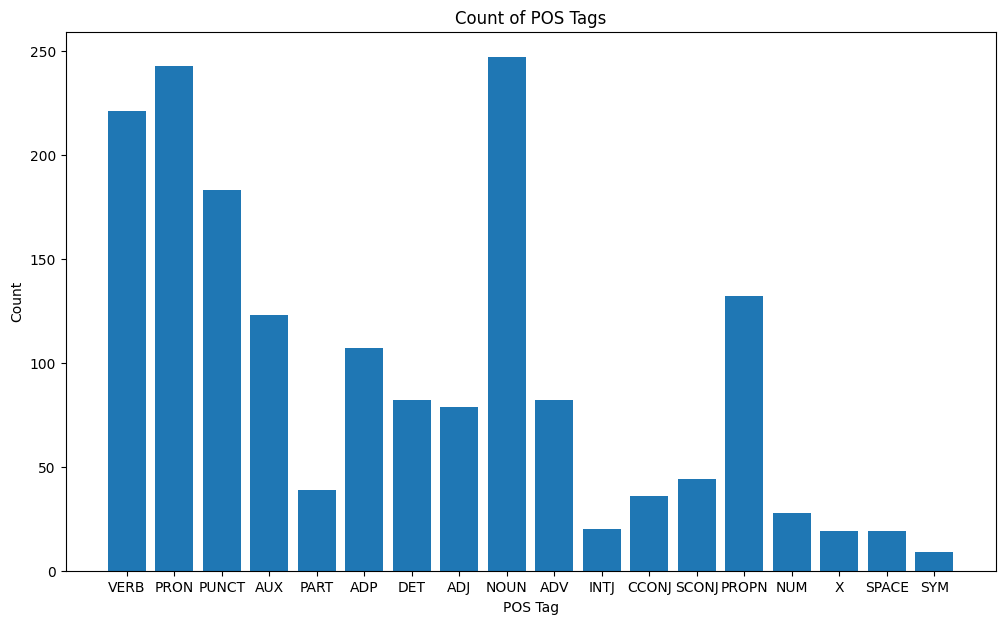

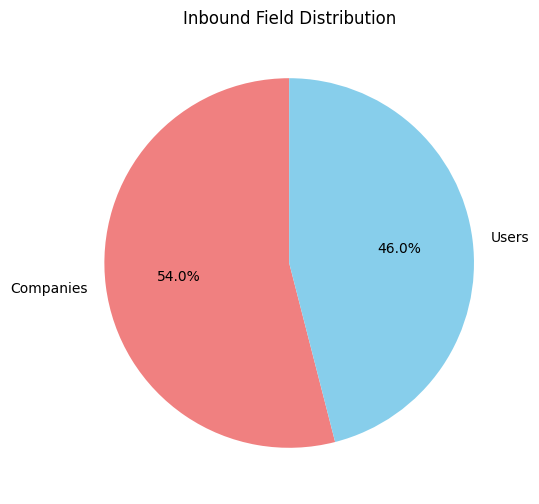

In [30]:
from collections import Counter

# 1. Load data
data = pd.read_csv('twcs_sample.csv', sep=',', encoding='latin1')
texts = data['text'].dropna().tolist()

# 2. Load spaCy model
nlp = spacy.load("en_core_web_lg")

# 3. Process texts
docs = list(nlp.pipe(texts))

# 4. Extract Entities and POS tags
entities = []
pos_tags = []

for doc in docs:
    entities.extend([ent.label_ for ent in doc.ents])
    pos_tags.extend([token.pos_ for token in doc])

# Count the time of each entity label
entity_counts = Counter(entities)

print("The answer will be...")
for label, count in entity_counts.items():
    print("{} appears {} times in the entities".format(label, count))

# Plot
plt.figure(figsize=(12,7))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title('Count of Entity Labels')
plt.xlabel('Entity Label')
plt.ylabel('Count')
plt.show()

# Count the time of each POS tag
pos_counts = Counter(pos_tags)

print("The answer will be...")
for pos, count in pos_counts.items():
    print("{} appears {} times in the POS tags".format(pos, count))

# Plot
plt.figure(figsize=(12,7))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title('Count of POS Tags')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.show()

# Count True/False
inbound_counts = data['inbound'][data['inbound'].isin([True, False])].value_counts()

print("")
# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(inbound_counts, labels=['Companies', 'Users'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Inbound Field Distribution')
plt.show()

2. Visualization of the Dataset Features and Results (15 Points)
- Detailed and insightful visualizations: 15 points
- Basic visualizations with some insights: 10 points
- Minimal effort in visualization: 5 points

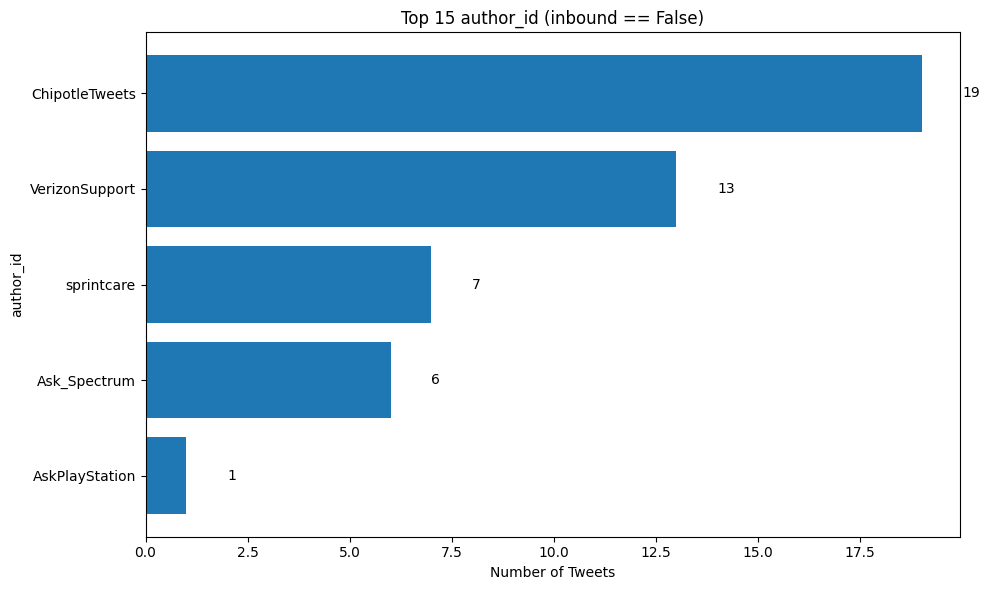

In [31]:
data.replace({'inbound': 'false'}, {'inbound': 'False'})

# Filter for inbound == False (company responses)
company_responses = data[data['inbound'] == False]

# Count number of messages per author_id
author_counts = company_responses['author_id'].value_counts().head(10)

# Plot horizontal bars
plt.figure(figsize=(10, 6))
bars = plt.barh(author_counts.index, author_counts.values)
plt.title('Top 15 author_id (inbound == False)')
plt.xlabel('Number of Tweets')
plt.ylabel('author_id')
plt.gca().invert_yaxis()  # highest at top

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

plt.tight_layout()
plt.show()

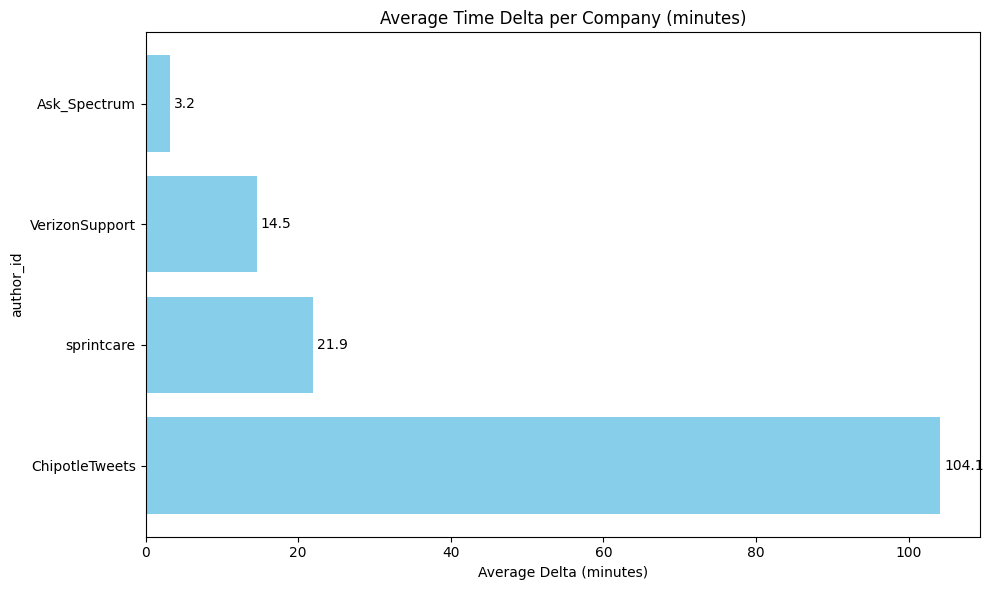

In [32]:
# Convert 'created_at' to datetime
data['created_at'] = pd.to_datetime(data['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# We will only analyze company tweets (inbound == False)
company_data = data[data['inbound'] == False]

# Sort by author_id and datetime (important for delta calculation)
company_data = company_data.sort_values(by=['author_id', 'created_at'])

# Group by author and calculate deltas
company_data['time_delta'] = company_data.groupby('author_id')['created_at'].diff().dt.total_seconds() / 60

# Remove first rows (delta is NaN for first entry of each author)
company_data = company_data.dropna(subset=['time_delta'])

# Now calculate average delta per author
avg_delta_per_author = company_data.groupby('author_id')['time_delta'].mean().sort_values(ascending=True)

# Take top 15 authors for clearer plot
avg_delta_top15 = avg_delta_per_author.head(15)

# Plot horizontal bars
plt.figure(figsize=(10, 6))
plt.barh(avg_delta_top15.index, avg_delta_top15.values, color='skyblue')
plt.title('Average Time Delta per Company (minutes)')
plt.xlabel('Average Delta (minutes)')
plt.ylabel('author_id')
plt.gca().invert_yaxis()
plt.tight_layout()

# Add value labels
for i, v in enumerate(avg_delta_top15.values):
    plt.text(v + 0.5, i, f"{v:.1f}", va='center')

plt.show()


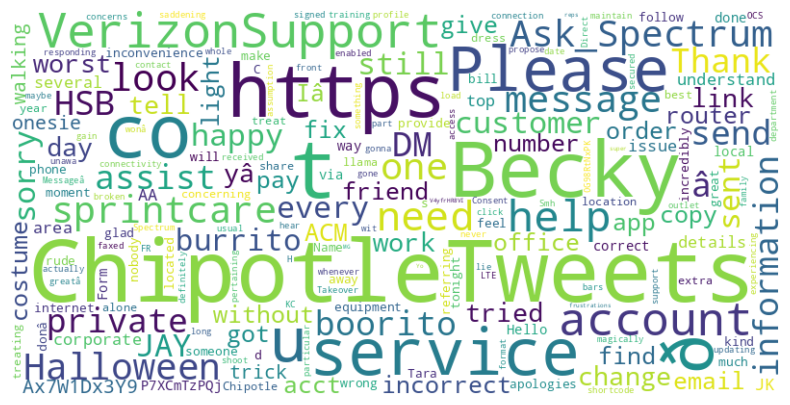

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(' '.join(data['text']))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

3. Cleaning the Text Document with Two Approaches

- Effective use of two distinct cleaning approaches, with clear explanations: 20 points
- Use of two approaches, but with limited explanation or effectiveness: 15 points
- Use of one approach or ineffective cleaning methods: 10 points

In [55]:
# Cleaning Approach 1 
# Regex pre-cleaning -> remove mentions, hashtags, urls), Emoji demojizing + mapping + spaCy lemmatization
# Remove stopwords, punctuations, numbers

import re
import emoji

EMOJI_MAP = {
    # Positive emotions
    ":smile:": "happy",
    ":grinning_face:": "happy",
    ":grinning_face_with_smiling_eyes:": "happy",
    ":beaming_face_with_smiling_eyes:": "very_happy",
    ":face_with_tears_of_joy:": "joy",
    ":rolling_on_the_floor_laughing:": "funny",
    ":wink:": "playful",
    ":blush:": "pleased",
    ":star-struck:": "amazed",
    ":red_heart:": "love",
    ":blue_heart:": "love",
    ":two_hearts:": "love",
    ":sparkling_heart:": "love",
    ":kissing_heart:": "affection",
    ":hugging_face:": "hug",
    ":clapping_hands:": "applause",
    ":thumbs_up:": "positive",
    ":ok_hand:": "approval",
    ":raising_hands:": "celebration",
    ":sun:": "sunny",
    ":fire:": "hot",
    ":star:": "excellent",
    ":trophy:": "victory",
    ":medal:": "achievement",
    ":party_popper:": "celebration",

    # Negative emotions
    ":angry_face:": "angry",
    ":pouting_face:": "angry",
    ":crying_face:": "sad",
    ":loudly_crying_face:": "very_sad",
    ":disappointed_face:": "disappointed",
    ":worried_face:": "worried",
    ":fearful_face:": "fear",
    ":confused_face:": "confused",
    ":tired_face:": "tired",
    ":weary_face:": "exhausted",
    ":face_with_steam_from_nose:": "frustrated",
    ":thumbs_down:": "negative",
    ":broken_heart:": "heartbroken",

    # Neutral / mixed
    ":thinking_face:": "thinking",
    ":neutral_face:": "neutral",
    ":expressionless_face:": "expressionless",
    ":face_with_raised_eyebrow:": "skeptical",
    ":sleeping_face:": "sleepy",
    ":sleepy_face:": "sleepy",
    ":face_with_rolling_eyes:": "annoyed",
    ":zipper-mouth_face:": "speechless",

    # Support-specific
    ":telephone_receiver:": "call",
    ":envelope:": "email",
    ":package:": "delivery",
    ":money_with_wings:": "payment",
    ":credit_card:": "payment",
    ":shopping_cart:": "shopping",

    # General
    ":warning:": "warning",
    ":exclamation_question_mark:": "uncertainty",
    ":hourglass_done:": "waiting",
    ":hourglass_not_done:": "waiting"
}
# First: Light cleaning with simple regex (remove mentions, URLs, hashtags)

def light_clean(text):
    text = text.lower()
    
    # Convert emojis to text code
    text = emoji.demojize(text)
    
    # Replace emoji codes with words
    for emoji_code, meaning in EMOJI_MAP.items():
        text = text.replace(emoji_code, meaning)
    
    # Remove remaining emoji codes (if any unmapped)
    text = re.sub(r':[a-z_]+:', '', text)
    
    # # Remove mentions, hashtags, urls
    # text = re.sub(r'@\w+', '', text)
    # text = re.sub(r'http\S+', '', text)
    # text = re.sub(r'#\w+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply light_clean first to all texts
light_cleaned_texts = [light_clean(t) for t in texts]

# Now run spaCy pipeline in batch mode
docs = nlp.pipe(light_cleaned_texts)
# 
# # Final deep cleaning
cleaned_texts_1 = []
# 
for doc in docs:
    tokens = [
        token.lemma_.lower() 
        for token in doc 
        if not token.is_punct          # remove punctuation
        and not token.is_stop          # remove stopwords
        and not token.like_num         # remove numbers
        and not token.is_space         # remove extra spaces
    ]
    cleaned_texts_1.append(" ".join(tokens))

# # OPTIONAL: Store back into dataframe
data['cleaned_text_1'] = cleaned_texts_1

# Display first few rows
print(data[['text', 'cleaned_text_1']].head(3))

                                                text  \
0  @115712 I understand. I would like to assist y...   
1      @sprintcare and how do you propose we do that   
2  @sprintcare I have sent several private messag...   

                                      cleaned_text_1  
0  @115712 understand like assist need private se...  
1                                @sprintcare propose  
2     @sprintcare send private message respond usual  


In [56]:
# Cleaning Approach 2
# Use spaCy entity filtering (NER-based cleaning)
# Custom filtering rules using spaCy token attributes

# texts = data['text'].dropna().tolist()

# Alternative clean function
def alternative_clean(text):
    doc = nlp(text.lower())
    
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop            # remove stopwords
        and not token.is_punct          # remove punctuation
        and not token.like_num          # remove numbers
        and not token.like_url          # remove urls automatically (spaCy can detect)
        and not token.is_space          # remove extra spaces
        and not token.is_email          # remove emails
        and not token.text.startswith('@') # remove mentions
        and not token.text.startswith('#') # remove hashtags
    ]
    return " ".join(tokens)

# Apply pipeline using nlp.pipe() for efficiency
docs = nlp.pipe(texts)
cleaned_texts_2 = []
# 
for doc in docs:
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop
        and not token.is_punct
        and not token.like_num
        and not token.like_url
        and not token.is_space
        # and not token.is_email
        and not token.text.startswith('@')
        and not token.text.startswith('#')
    ]
    cleaned_texts_2.append(" ".join(tokens))
# 
# # Add back into dataframe
data['cleaned_text_2'] = cleaned_texts_2

# Show sample output
# print(data[['text', 'cleaned_text_2']].head())

data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,cleaned_text_2,cleaned_text_1
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,understand like assist need private secure lin...,@115712 understand like assist need private se...
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,propose,@sprintcare propose
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,send private message respond usual,@sprintcare send private message respond usual
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,send private message assist click âmessageâ...,@115712 send private message assist click âm...
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,,@sprintcare


In [57]:
# Iterate row-by-row
for idx, row in data.iterrows():
    print(f"Original: {row['text']}")
    print(f"Approach 1: {row['cleaned_text_1']}")
    print(f"Approach 2: {row['cleaned_text_2']}")
    print('-' * 60)

Original: @115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.
Approach 1: @115712 understand like assist need private secure link assist
Approach 2: understand like assist need private secure link assist
------------------------------------------------------------
Original: @sprintcare and how do you propose we do that
Approach 1: @sprintcare propose
Approach 2: propose
------------------------------------------------------------
Original: @sprintcare I have sent several private messages and no one is responding as usual
Approach 1: @sprintcare send private message respond usual
Approach 2: send private message respond usual
------------------------------------------------------------
Original: @115712 Please send us a Private Message so that we can further assist you. Just click âMessageâ at the top of your profile.
Approach 1: @115712 send private message assist click âmessageâ profile
Approach 2: send priv

In [60]:
class CleaningEvaluationPipeline:
    def __init__(self, data, text_columns, target_column=None):
        """
        Initialize with dataframe, text columns to compare, and target column for ML evaluation (optional).
        """
        self.data = data
        self.text_columns = text_columns  # list of cleaned text columns to compare
        self.target_column = target_column

    def ml_evaluation(self, embed_function, test_size=0.2):
            """
            Compare ML performance across cleaning methods.
            Requires an embedding function that converts text to feature vectors.
            """
            if self.target_column is None:
                print("No target column provided for ML evaluation.")
                return
            
            for col in self.text_columns:
                print(f"\nEvaluating ML for cleaning: {col}")
                texts = self.data[col].dropna().tolist()
                labels = self.data[self.target_column].iloc[:len(texts)]
                X = embed_function(texts)
                X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=test_size, random_state=42)

                clf = LogisticRegression(max_iter=1000)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                acc = accuracy_score(y_test, y_pred)
                print(f"Accuracy: {acc:.4f}")

In [62]:
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

class CleaningEvaluationPipeline:
    def __init__(self, data, text_columns, target_column=None):
        """
        Initialize with dataframe, text columns to compare, and target column for ML evaluation (optional).
        """
        self.data = data
        self.text_columns = text_columns  # list of cleaned text columns to compare
        self.target_column = target_column

    def manual_sample(self, n=20):
        """
        Randomly sample n rows and show original + all cleaned versions.
        """
        sample = random.sample(list(self.data.index), n)
        for idx in sample:
            print(f"\nOriginal: {self.data.loc[idx, 'text']}")
            for col in self.text_columns:
                print(f"{col}: {self.data.loc[idx, col]}")
            print("-"*60)

    def token_distribution(self, top_n=20):
        """
        Compare token frequencies for each cleaning approach.
        """
        for col in self.text_columns:
            tokens = ' '.join(self.data[col].dropna()).split()
            counter = Counter(tokens)
            print(f"\nTop {top_n} tokens for {col}:")
            for word, count in counter.most_common(top_n):
                print(f"{word}: {count}")

    def length_distribution(self):
        """
        Compare text length distribution for each approach.
        """
        plt.figure(figsize=(10, 5))
        for col in self.text_columns:
            self.data[f'length_{col}'] = self.data[col].apply(lambda x: len(x.split()))
            self.data[f'length_{col}'].hist(alpha=0.5, bins=20, label=col)
        plt.title("Text Length Distribution")
        plt.xlabel("Number of Words")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

    def ml_evaluation(self, embed_function, test_size=0.2):
        """
        Compare ML performance across cleaning methods.
        Requires an embedding function that converts text to feature vectors.
        """
        if self.target_column is None:
            print("No target column provided for ML evaluation.")
            return
        
        for col in self.text_columns:
            print(f"\nEvaluating ML for cleaning: {col}")
            texts = self.data[col].dropna().tolist()
            labels = self.data[self.target_column].iloc[:len(texts)]
            X = embed_function(texts)
            X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=test_size, random_state=42)

            clf = LogisticRegression(max_iter=1000)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Accuracy: {acc:.4f}")



Original: @VerizonSupport What else can I provide? They refuse to help me because they cannot validate the account...
cleaned_text_1: @verizonsupport provide refuse help validate account
cleaned_text_2: provide refuse help validate account
------------------------------------------------------------

Original: @Ask_Spectrum That is INCORRECT information I have the form in front of me that is faxed over-maybe you need to maintain up to date information
cleaned_text_1: @ask_spectrum incorrect information form fax maybe need maintain date information
cleaned_text_2: incorrect information form fax maybe need maintain date information
------------------------------------------------------------

Original: @115734 I mean, Boorito is basically the adult version of Halloween... -Becky
cleaned_text_1: @115734 mean boorito basically adult version halloween -becky
cleaned_text_2: mean Boorito basically adult version Halloween -Becky
------------------------------------------------------------

O

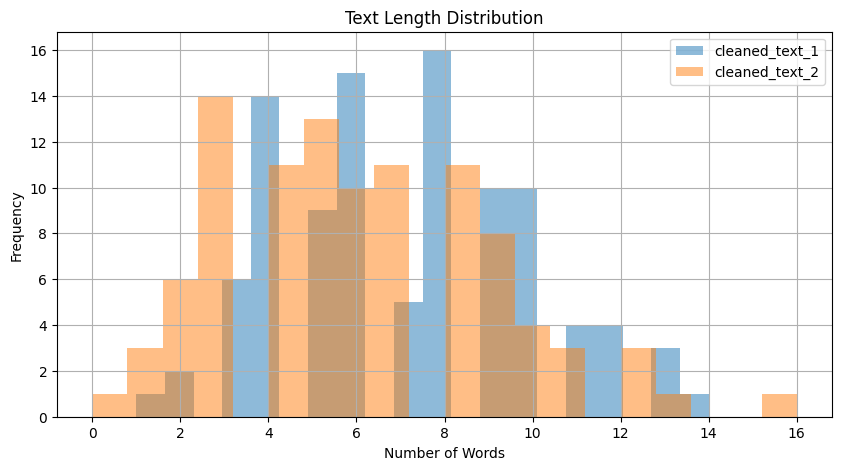


Evaluating ML for cleaning: cleaned_text_1


/home/user/project_nlp_fanshawe/.venv/lib/python3.10/site-packages/sklearn/utils/multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")


Accuracy: 0.0000

Evaluating ML for cleaning: cleaned_text_2


/home/user/project_nlp_fanshawe/.venv/lib/python3.10/site-packages/sklearn/utils/multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")


Accuracy: 0.0000


In [65]:
evaluator = CleaningEvaluationPipeline(
    data=data, 
    text_columns=['cleaned_text_1', 'cleaned_text_2'], 
    target_column='text'  # only if you want ML evaluation
)

evaluator.manual_sample(n=10)
evaluator.token_distribution(top_n=20)
evaluator.length_distribution()

list_text = []

list_text = data['text'].dropna().tolist()

# If you have embeddings ready:
# Define simple example embed_function for Bag-of-Words
from sklearn.feature_extraction.text import CountVectorizer

def embed_function(texts):
    vec = CountVectorizer()
    return vec.fit_transform(list_text)

evaluator.ml_evaluation(embed_function)

4. Implementation of Three Word Embedding Methods (30 Points)
- Comprehensive and effective implementation of three methods, including one with SpaCy: 30 points
- Implementation of three methods, but with minor issues or lack of depth: 20 points
- Implementation of less than three methods or major issues in implementation: 10 points

In [37]:
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sentence_transformers import SentenceTransformer

def bow(text):

    # Initialize BoW vectorizer
    vectorizer_bow = CountVectorizer()

    # Fit and transform
    X_bow = vectorizer_bow.fit_transform(cleaned_texts)

    print("BoW shape:", X_bow.shape)
    
    return X_bow

In [38]:
def tfidf(text):

    # Initialize TF-IDF vectorizer
    vectorizer_tfidf = TfidfVectorizer()

    # Fit and transform
    X_tfidf = vectorizer_tfidf.fit_transform(cleaned_texts)

    print("TF-IDF shape:", X_tfidf.shape)
    
    return X_tfidf


In [39]:
def bert(text):

    # Load pre-trained model
    model = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight, fast and accurate

    # Generate sentence embeddings
    X_bert = model.encode(cleaned_texts)

    print("Sentence-BERT embeddings shape:", X_bert.shape)
    
    return X_bert


In [40]:
import numpy as np

# Create dictionary of methods
embedding_methods = {
    "BoW": bow,
    "TF-IDF": tfidf,
    "spaCy": bert
}

# Start timer
start_time = time.time()

# Loop over each embedding method and calculate processing time
for name, method in embedding_methods.items():
    print(f"\nProcessing: {name}")
    start_time = time.time()
    X = method(cleaned_texts)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Output dimensions
    if isinstance(X, np.ndarray):
        shape = X.shape
    else:
        shape = X.shape  # sparse matrix shape works here too
    
    print(f"Shape: {shape}")
    print(f"Processing time: {elapsed_time:.4f} seconds")


Processing: BoW
BoW shape: (200, 385)
Shape: (200, 385)
Processing time: 0.0533 seconds

Processing: TF-IDF
TF-IDF shape: (200, 385)
Shape: (200, 385)
Processing time: 0.0069 seconds

Processing: spaCy
Sentence-BERT embeddings shape: (200, 384)
Shape: (200, 384)
Processing time: 1.6012 seconds


 - TF-IDF and BoW are computationally very efficient (sub-second processing for 200 samples), while Sentence-BERT requires more time (1.6 seconds).
- Semantic representation is significantly stronger for Sentence-BERT, which captures contextual meaning. BoW and TF-IDF ignore word order and meaning entirely.
- For small datasets, all methods are feasible. For real semantic tasks (e.g., clustering, retrieval, intent detection), Sentence-BERT is strongly recommended despite higher computational cost.

5. Comparison of the Results of Word Embedding Methods (10 Points)
- In-depth and insightful comparison, with clear findings: 10 points
- Basic comparison with some insights: 7 points
- Superficial comparison or missing key aspects: 5 points

In [21]:
# Do a sample test dataset to next process of comparison
test_dataset = pd.read_csv('sample.csv',sep=';',encoding = 'latin1')
test_dataset.head(8)

,tweet_id,author_id,inbound,created_at,text,text_altered,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,@115713 This is saddening to hear. Please shoo...,NaN,12.0


In [69]:
import pandas as pd
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

class SemanticSimilarityEvaluator:
    def __init__(self, data, original_col, cleaned_col, model="en_core_web_md"):
        """
        Initialize with dataframe, column names, and spaCy model.
        """
        self.data = data
        self.original_col = original_col
        self.cleaned_col = cleaned_col
        self.nlp = spacy.load(model)

    def compute_similarity(self):
        """
        Compute cosine similarity row-by-row.
        """
        similarities = []
        for i, row in self.data.iterrows():
            doc_orig = self.nlp(str(row[self.original_col]))
            doc_clean = self.nlp(str(row[self.cleaned_col]))
            sim = cosine_similarity([doc_orig.vector], [doc_clean.vector])[0][0]
            similarities.append(sim)
        self.data['similarity'] = similarities
        return self.data

    def similarity_summary(self):
        """
        Print basic similarity stats.
        """
        print("Similarity Summary:")
        print(self.data['similarity'].describe())

    def plot_similarity_distribution(self):
        """
        Plot similarity distribution.
        """
        plt.figure(figsize=(8,5))
        self.data['similarity'].hist(bins=30, color='skyblue', edgecolor='black')
        plt.title("Cosine Similarity Distribution")
        plt.xlabel("Cosine Similarity")
        plt.ylabel("Frequency")
        plt.show()

6. Report and Description of Work Done (20 Points)
- Comprehensive and well-structured report, clearly describing all aspects of the project: 20 points
- Adequately detailed report with minor omissions or structural issues: 15 points
- Poorly structured report with significant omissions: 10 points

Similarity Summary:
count    20.000000
mean      0.999637
std       0.001623
min       0.992743
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: similarity, dtype: float64


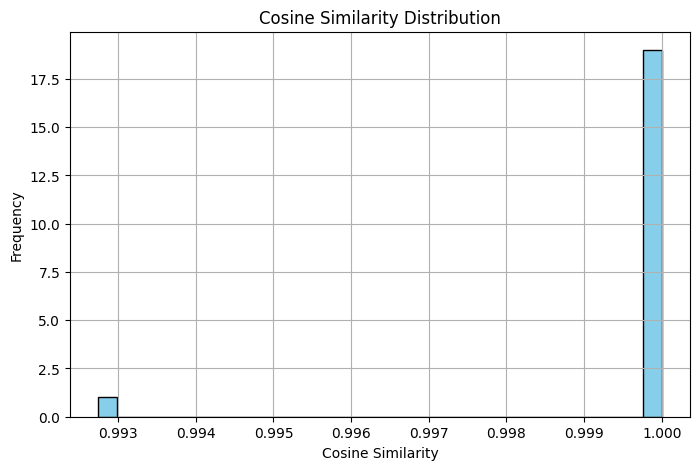

In [73]:
# Initialize evaluator
evaluator = SemanticSimilarityEvaluator(
    data=test_dataset, 
    original_col='text', 
    cleaned_col='text_altered',
    model="en_core_web_md"  # This is very important!
)

# Compute similarity
data_with_similarity = evaluator.compute_similarity()

# Show summary
evaluator.similarity_summary()

# Plot distribution
evaluator.plot_similarity_distribution()